# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

## Class for building random data , splitting it in a given ratio and plotting data

In [85]:
class Build_data:
    def __init__(self,n_data,features,classes,max_val,split):
        self.train_data=np.array([])
        self.test_data=np.array([])
        self.data=np.array([])
        self.n_data=n_data
        self.features=features
        self.classes=classes
        self.max_val=max_val
        self.split=split
        
    # creating the dataset randomly
    def create_dataset(self):
        unique = 0
        while unique!=self.n_data:
            for i in range(self.n_data-unique):
                 # appending index
                self.data=np.append(self.data,[i+1]) 
                for j in range(self.features):     
                     # appenind features
                    self.data=np.append(self.data,[np.random.randint(0,self.max_val+1)])
                # appending class label
                self.data=np.append(self.data,[np.random.randint(0,self.classes)])  
            # reshaping to make a matrix
            self.data=np.reshape(self.data,(self.n_data,self.features+2))  
            # Conforming with the uniqueness of data
            self._data = [list(x for x in set(tuple(x) for x in self.data))]
            unique = len(self.data) 


    # preprocessing the dataset , splitting the dataset into test and train
    def process_dataset(self):
        # randomly shuffling the data
        clone_data=np.random.permutation(self.data)
        # splitting it ,80% to training set,remaining to test
        self.train_data = clone_data[:int((len(self.data)+1)*self.split/100)] 
        self.test_data = clone_data[int(len(self.data)*self.split/100):]
    def create_csv(self):
        #saving the dataset ,test set , and train set to csv files
        np.savetxt("dataset.csv",self.data,delimiter=",")
        np.savetxt("train_data.csv",self.train_data, delimiter=",")
        np.savetxt("test_data.csv",self.test_data,delimiter=",")
    
    # Plotting the data , I have plotted the distance of the data point against its first feature
    # no normalization was required as as the range value of all the features is same
    def plot_data(self):
        train_dist0=[]
        train_label0=[]
        train_dist1=[]
        train_label1=[]
        test_dist0=[]
        test_label0=[]
        test_dist1=[]
        test_label1=[]
        for train_dp in self.train_data:
            if train_dp[7]==0:
                train_label0.append(train_dp[1])
                train_dist0.append((np.sum(train_dp[1:7]**2))**0.5)
            else :
                train_label1.append(train_dp[1])
                train_dist1.append((np.sum(train_dp[1:7]**2))**0.5)
        for test_dp in self.test_data:
            if test_dp[7]==0:
                test_label0.append(test_dp[1])
                test_dist0.append((np.sum(test_dp[1:7]**2))**0.5)
            else :
                test_label1.append(test_dp[1])
                test_dist1.append((np.sum(test_dp[1:7]**2))**0.5)
                
        plt.figure(figsize=(9,7))
        plt.plot(train_label0,train_dist0,'r.' ,label='Train label 0')
        plt.plot(train_label1,train_dist1,'b.',label='Train label 1')
        plt.plot(test_label0,test_dist0,'g.',label='Test label 0')
        plt.plot(test_label1,test_dist1,'y.',label='Test label 1')
        plt.legend()
        plt.show()

## creating a class object and plotting the data

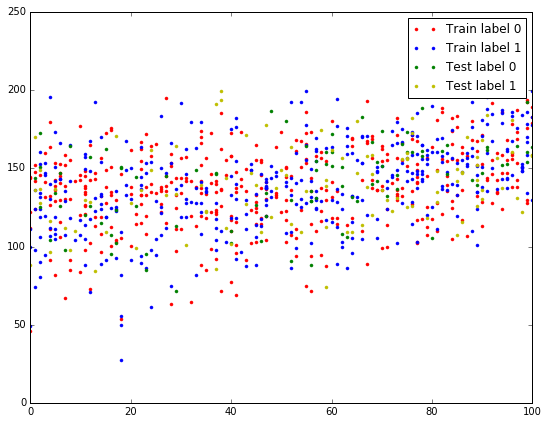

In [86]:
c1 = Build_data(1000,6,2,100,80)
c1.create_dataset()
c1.process_dataset()
c1.create_csv()
c1.plot_data()

# Class where custom Knn and scikit Knn is implemented  

In [87]:

class Knn:
    def __init__(self,k,features):
        self.k=k
        self.features=features

    # training and testing Knn on the built dataset
    def run(self):
        # dist list array's first value is the distance of test dp from a train dp, 
        # 2nd value is 1 if the both the classes of both the points match otherwise it is 0
        
        positive=0
        train_data=np.genfromtxt('train_data.csv',delimiter=',')
        test_data=np.genfromtxt('test_data.csv',delimiter=',')
        # for each point in the test set , predicting its class 
        for test in test_data:
            dist=np.array([[0,0]])   # appending 0 0 dummy array for later concatenating ,this is a programming trick , we dont use this value
            true=0
            x=test[1:self.features+1]
            y=test[self.features+1]
            # calculating the test dp distance form all the training data points
            max_dist=0
            n_elemnts=0
            for train in train_data:
                xt=train[1:self.features+1]
                yt=train[self.features+1]
                train_distance=np.sum((x-xt)**2)               # calculating only sum of square of differnce of coordinates as it gives a similar measure of distance
                if max_dist<train_distance:                  # after encountering 50 datapoint if we get a train point far away(wrt those 50 points) , ignore it
                    if n_elemnts<51:
                        n_elemnts=n_elemnts+1
                        max_dist = train_distance
                        dist=np.concatenate((dist,[[train_distance,int(y==yt)]]),axis=0)
                else :
                    n_elemnts = n_elemnts+1
                    dist=np.concatenate((dist,[[train_distance,int(y==yt)]]),axis=0)
            # sorting the distance array , the first value 
            dist=dist[np.argsort(dist[:, 0])]
            # selecting the k best training datapoints based on distance 
            # and checking if majority of training points had the same class of test dp 
            for kn in range(1,self.k+1):       # start from 1 as the 0th dimensional array is a dummy
                if dist[kn][1]==1:             # dist[kn][1]==1 if the knth nearest point have same label as test datapoint
                    true=true+1
            # if majority have same class as test dp , then our prediction is correct otherwise wrong
            if true>self.k-true:
                positive=positive+1
            elif true==self.k-true:
                if np.random.randint(0,2) == 1:
                    positive=positive+1
            else:
                ;
                # reinitializing the dist array for the remaining test dps
            dist=np.array([[0,0]])
        # calculating and returning the accuracy
        accuracy=float(positive)/len(test_data)
        return accuracy
    
    # scikit implementation of knn
    def scikit_run(self):
        train_data = np.genfromtxt('train_data.csv',delimiter=',')
        test_data = np.genfromtxt('test_data.csv',delimiter=',')
        x_train = train_data[:, 1:self.features+1]
        y_train = train_data[:,self.features+1]
        x_test = test_data[:, 1:self.features+1]
        y_test = test_data[:,self.features+1]
        knn = KNeighborsClassifier(n_neighbors=self.k)
        # fitting the model
        knn.fit(x_train, y_train)
        # predict the response
        pred = knn.predict(x_test)
        # evaluate accuracy
        accuracy=knn.score(x_test, y_test)
        return accuracy
       
        


# Running the Knn for custom and scikit implementation

In [88]:
import time
my_accuracy=[]
scikit_accuracy=[]
my_runtime=[]
scikit_runtime=[]
k1=np.array([i for i in range(1,22)])
for k in range(1,22):
    example1=Knn(k,6)
    print "k = ",k
    start=time.clock()
    accuracy = example1.run()
    end=time.clock()
    print "My accuracy = ",accuracy
    my_accuracy+=[accuracy]
    my_runtime+=[end-start]
    print "My time = ",end-start
    print "\n"
    start = time.clock()
    accuracy = example1.scikit_run()
    end = time.clock()
    print "Scikit accuracy = ",accuracy
    scikit_accuracy += [accuracy]
    scikit_runtime += [end-start]
    print "Scikit Time = ",end-start
    print "\n"


k =  1
My accuracy =  0.5
My time =  1.477181


Scikit accuracy =  0.5
Scikit Time =  0.01307


k =  2
My accuracy =  0.48
My time =  1.492728


Scikit accuracy =  0.47
Scikit Time =  0.012706


k =  3
My accuracy =  0.45
My time =  1.521324


Scikit accuracy =  0.45
Scikit Time =  0.0132


k =  4
My accuracy =  0.455
My time =  1.762708


Scikit accuracy =  0.435
Scikit Time =  0.013583


k =  5
My accuracy =  0.47
My time =  1.462436


Scikit accuracy =  0.47
Scikit Time =  0.013552


k =  6
My accuracy =  0.465
My time =  1.464596


Scikit accuracy =  0.435
Scikit Time =  0.01436


k =  7
My accuracy =  0.45
My time =  1.480391


Scikit accuracy =  0.45
Scikit Time =  0.013654


k =  8
My accuracy =  0.47
My time =  1.461039


Scikit accuracy =  0.46
Scikit Time =  0.01455


k =  9
My accuracy =  0.46
My time =  1.536168


Scikit accuracy =  0.46
Scikit Time =  0.031541


k =  10
My accuracy =  0.455
My time =  1.641023


Scikit accuracy =  0.45
Scikit Time =  0.01994


k =  11
My a

## Plotting the custom accuracy,time and Knn accuracy,time

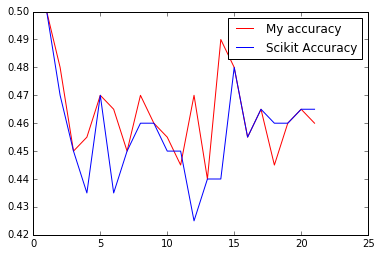

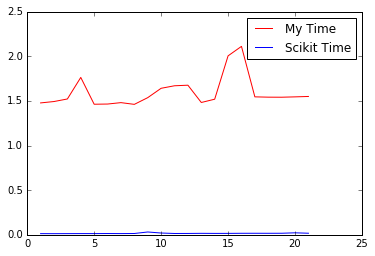

In [89]:
# My accuracy and test time is shown in red and scikit's in blue
plt.plot(k1,my_accuracy,'r',label='My accuracy')
plt.plot(k1,scikit_accuracy,'b',label='Scikit Accuracy')
plt.legend()
plt.show()

plt.plot(k1,my_runtime,'r',label='My Time')
plt.plot(k1,scikit_runtime,'b',label='Scikit Time')
plt.legend()
plt.show()

# Inferences

## Accuracy
The accuracy is almost 50 % for both the implementations (custom and the scikit one), 
this is expected as the data points are generated randomly(without bias)

The accuracy for both my implementation and inbuilt scikit library implementation is almost same , except for even values , where I have randomly selected class when there is no clear majority.

## Design decision for even value of k

For even value of k , I break the tie by randomly selecting the class label, the accuracy now comes to be about 50 % for even value of k also

If this was not done and we select to add tie breaks to wrongs , then for low even values we get poor accuracy and the accuracy becomes almost 50 % for higher even values, this is expected 

## Time taken 

Time taken in inbuilt method is way too less , I have optimized the code for knn by selecting reducing the length of the array I need to sort for selecting 50 best 